In [14]:
import sys
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict, train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

from mlxtend.evaluate import bias_variance_decomp
from imblearn.over_sampling import SMOTE

from models import get_data, run_model



In [17]:
def run_kfold(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    predicted = cross_val_predict(model, X, y, cv=kf)
    print(f'      predicted: {predicted}')
    scores = cross_val_score(model, X, y, cv=kf)
    mean_score = scores.mean()
    print("      Cross-Validation Scores:", scores)
    print("      Mean Score:", scores.mean())
    print("      Standard Deviation of Scores:", scores.std())

    report = classification_report(y, predicted)
    print("Classification Report:")
    print(report)


In [ ]:
model = MLPClassifier(hidden_layer_sizes=(96, 100), max_iter=1000, random_state=42, activation='logistic')
X, y = get_data(filename=pca_100_filename)
run_kfold(model, X, y)

In [18]:
pca_100_filename = '/Users/dylanwu/Development/cs_6140/project/data/tfidf_pca_100features_1000rows.csv'
X, y = get_data(filename=pca_100_filename)
# model = MLPClassifier(hidden_layer_sizes=(96, 100), max_iter=1000, random_state=42, activation='logistic')

samples_map = pd.read_csv(f'./data/cleaned_samples_{1000}rows.csv')

kf = KFold(n_splits=5, shuffle=True, random_state=42)
predicted = cross_val_predict(model, X, y, cv=kf)
print(f'      predicted: {predicted}')
scores = cross_val_score(model, X, y, cv=kf)
mean_score = scores.mean()
print("      Cross-Validation Scores:", scores)
print("      Mean Score:", scores.mean())
print("      Standard Deviation of Scores:", scores.std())

bias = np.mean(y != predicted)  # Bias as misclassification rate print(f"      Misclassification rate (Bias): {bias}")
variance = np.var(predicted != y)  # Variance as the variance of misclassifications
print(f"      Variance of Misclassifications: {variance}")

# Get misclassified indexes
misclassified_indexes = np.where(y != predicted)[0]
misclassified_samples = samples_map.iloc[misclassified_indexes]  # Assuming X is a DataFrame
misclassified_samples.loc[:, 'Predicted'] = predicted[misclassified_indexes]

samples_filename = './data/mlp_pca_misclassified.csv'
print(f'samples_filename: {samples_filename}')
misclassified_samples.to_csv(samples_filename)


shape of data: (13574, 102)
      predicted: ['Bash' 'Bash' 'Bash' ... 'Text' 'Text' 'Text']
      Cross-Validation Scores: [0.95764273 0.95653775 0.96279926 0.95911602 0.95652174]
      Mean Score: 0.958523500680599
      Standard Deviation of Scores: 0.0023391979423180997
      Variance of Misclassifications: 0.03975606408641104
samples_filename: ./data/mlp_pca_misclassified.csv


/var/folders/dy/1d5mpryn48v0bmfjg4xjs9880000gn/T/ipykernel_15698/2411439378.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_samples.loc[:, 'Predicted'] = predicted[misclassified_indexes]


In [6]:
pca_100_filename = '/Users/dylanwu/Development/cs_6140/project/data/tfidf_pca_100features_1000rows.csv'
tfidf_filename = '/Users/dylanwu/Development/cs_6140/project/data/tfidf_100features_1000rows.csv'
bow_filename = '/Users/dylanwu/Development/cs_6140/project/data/bow_100features_1000rows.csv'
X, y = get_data(filename=pca_100_filename)

# mlp = MLPClassifier(hidden_layer_sizes=(3, 3, 3), max_iter=1000)

mlp = MLPClassifier(hidden_layer_sizes=(96, 100), max_iter=1000, random_state=42, activation='logistic')

run_kfold(mlp, X, y)

# # FOR TFIDF
# shape of data: (13574, 102)
#       predicted: ['Go' 'Text' 'PowerShell' ... 'C++' 'Java' 'Text']
#       Cross-Validation Scores: [0.30276243 0.27440147 0.45598527 0.49097606 0.46904937]
#       Mean Score: 0.3986349207641708
#       Standard Deviation of Scores: 0.0909940953701574


# (3,3,3) PCA TFIDF
    #   Cross-Validation Scores: [0.93149171 0.67918969 0.71270718 0.95690608 0.85924834]
    #   Mean Score: 0.8279086002461827
    #   Standard Deviation of Scores: 0.1129076362043759

shape of data: (13574, 102)
      predicted: ['Bash' 'Bash' 'Bash' ... 'Text' 'Text' 'Text']
      Cross-Validation Scores: [0.95764273 0.95653775 0.96279926 0.95911602 0.95652174]
      Mean Score: 0.958523500680599
      Standard Deviation of Scores: 0.0023391979423180997


In [5]:
mlp_opt = MLPClassifier(hidden_layer_sizes=(96, 100), max_iter=1000, random_state=42, activation='logistic')
run_kfold(mlp_opt, X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(3, 3, 3), max_iter=100, random_state=42)  # Adjust parameters as needed

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

y_train_pred = mlp.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy

print(f'\nTraining Accuracy: {train_accuracy:.4f}')
print(f'Training Error: {train_error:.4f}')


Confusion Matrix:
[[126   3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  9 170  16   0   0   0   0   0   0   0   0   0   0   0]
 [  1  14 175   6   3   0   0   0   0   0   0   0   0   0]
 [  0   1   2 196   6   2   0   0   0   0   0   0   0   0]
 [  0   0   0   7 195   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2 189   1   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0 178  13   0   0   0   0   0   0]
 [  0   0   0   0   1   0   7 180  10   0   0   0   0   0]
 [  0   0   0   0   0   0   1   3 194   3   3   0   0   0]
 [  0   0   0   0   0   0   0   0   8 190   9   1   2   0]
 [  0   0   0   0   0   0   0   0   0   6 174   5   3   1]
 [  0   0   0   0   0   0   0   0   0   0   3 190   2   1]
 [  0   0   0   0   0   0   0   0   0   0   0   4 182   9]
 [  0   0   0   0   0   0   0   0   0   0   0   2   4 200]]
Classification Report:
              precision    recall  f1-score   support

        Bash       0.93      0.98      0.95       129
           C       0.90

/Users/dylanwu/Development/cs_6140/ml_class/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(max_iter=1000)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

y_train_pred = mlp.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy

print(f'\nTraining Accuracy: {train_accuracy:.4f}')
print(f'Training Error: {train_error:.4f}')

Confusion Matrix:
[[124   5   0   0   0   0   0   0   0   0   0   0   0   0]
 [  7 165  23   0   0   0   0   0   0   0   0   0   0   0]
 [  0  14 174   9   2   0   0   0   0   0   0   0   0   0]
 [  1   0   1 203   1   0   1   0   0   0   0   0   0   0]
 [  0   0   2  14 181   5   1   0   0   0   0   0   0   0]
 [  0   0   0   0   3 186   1   2   0   0   0   0   0   0]
 [  0   0   0   0   3   1 181   6   1   0   0   0   0   0]
 [  1   0   0   0   1   2   6 179   6   2   0   0   1   0]
 [  0   0   0   0   0   0   1   7 193   1   1   0   1   0]
 [  0   0   0   0   0   0   0   5   7 185   9   4   0   0]
 [  0   0   0   0   0   0   0   2   0   9 173   3   1   1]
 [  0   0   0   0   0   0   0   1   1   0   2 189   2   1]
 [  0   0   0   0   0   0   0   0   0   0   1   5 175  14]
 [  0   0   0   0   0   0   0   0   0   0   1   4   8 193]]
Classification Report:
              precision    recall  f1-score   support

        Bash       0.93      0.96      0.95       129
           C       0.90

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def overfitting_data(layers, nodes_limit):
    test_accuracies = []
    train_accuracies = []

    for node_size in range(50, nodes_limit):
        mlp = MLPClassifier(hidden_layer_sizes=(node_size,)*layers, max_iter=1000)
        mlp.fit(X_train, y_train)

        y_pred = mlp.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_accuracies.append(test_accuracy)

        y_train_pred = mlp.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_accuracies.append(train_accuracy)

        print(f'i={node_size} train={train_accuracy} test={test_accuracy}')

    return test_accuracies, train_accuracies

# train_accuracies_1node, test_accuracies_1node = overfitting_data(1, 10)


In [5]:
print(train_accuracies_1node)
print(test_accuracies_1node)

[0.5871086556169429, 0.9049723756906077, 0.9646408839779006, 0.9591160220994475, 0.958011049723757, 0.9572744014732965, 0.9591160220994475, 0.9543278084714549, 0.949171270718232]
[0.6006998802836357, 0.9182245142278295, 0.9753200110507413, 0.9736623998526568, 0.9790956810019339, 0.9859103048162814, 0.9883967216134082, 0.988765079657427, 0.990606869877521]


In [9]:
larg_train_acc, larg_test_acc = overfitting_data(3, 150)

i=90 train=0.9926328391196243 test=0.9278084714548803
i=91 train=0.9941983608067041 test=0.9248618784530387


/Users/dylanwu/Development/cs_6140/ml_class/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i=92 train=0.9932774656966572 test=0.9255985267034991
i=93 train=0.9881204530803941 test=0.9152854511970534


/Users/dylanwu/Development/cs_6140/ml_class/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i=94 train=0.9289068975043743 test=0.8732965009208103
i=95 train=0.9968689566258403 test=0.9285451197053407
i=96 train=0.989685974767474 test=0.9167587476979742
i=97 train=0.9945667188507229 test=0.9333333333333333
i=98 train=0.9913435859655585 test=0.9255985267034991
i=99 train=0.9925407496086196 test=0.9281767955801105
i=100 train=0.9941983608067041 test=0.9333333333333333
i=101 train=0.9940141817846947 test=0.9285451197053407
i=102 train=0.9955797034717746 test=0.9314917127071823
i=103 train=0.9903306013445069 test=0.9255985267034991
i=104 train=0.9928170181416337 test=0.9274401473296501
i=105 train=0.9900543328114928 test=0.928913443830571
i=106 train=0.9900543328114928 test=0.9244935543278084
i=107 train=0.9884888111244129 test=0.9230202578268877
i=108 train=0.9911594069435491 test=0.9318600368324125
i=109 train=0.9953955244497652 test=0.9366482504604051
i=110 train=0.9945667188507229 test=0.9303867403314917
i=111 train=0.9941062712956994 test=0.932596685082873
i=112 train=0.99309

In [11]:
import matplotlib.pyplot as plt


In [10]:
train_accuracies_2layer, test_accuracies_2layer = overfitting_data(2, 10)

# train_accuracies_3layer, test_accuracies_3layer = overfitting_data(1, 10)

i=1 train=0.5693894465420388 test=0.5543278084714549
i=2 train=0.8616815544709457 test=0.8559852670349908
i=3 train=0.9760567271387789 test=0.961694290976059
i=4 train=0.9785431439359057 test=0.9569060773480663
i=5 train=0.9920803020535961 test=0.972744014732965
i=6 train=0.989685974767474 test=0.961694290976059
i=7 train=0.9882125425913988 test=0.9554327808471454
i=8 train=0.9937379132516806 test=0.961694290976059
i=9 train=0.9930011971636431 test=0.9499079189686924


In [13]:
train_accuracies_3layer, test_accuracies_3layer = overfitting_data(3, 10)

train_accuracies_4layer, test_accuracies_4layer = overfitting_data(4, 10)

i=1 train=0.07468459342480892 test=0.06961325966850829
i=2 train=0.5656137765908463 test=0.556537753222836
i=3 train=0.9798323970899715 test=0.9657458563535911
i=4 train=0.9758725481167695 test=0.961694290976059
i=5 train=0.9813979187770513 test=0.9591160220994475
i=6 train=0.9871995579703472 test=0.9591160220994475
i=7 train=0.9850814992172392 test=0.9506445672191528
i=8 train=0.9899622433004881 test=0.9627992633517496
i=9 train=0.9831476194861405 test=0.9440147329650093
i=1 train=0.6389170273505848 test=0.6243093922651933
i=2 train=0.9008195966479418 test=0.8983425414364641
i=3 train=0.7416889216318261 test=0.7318600368324125
i=4 train=0.9806612026890137 test=0.9602209944751381
i=5 train=0.9807532922000184 test=0.9642725598526704
i=6 train=0.9776222488258587 test=0.9583793738489871
i=7 train=0.9864628418823096 test=0.9550644567219153
i=8 train=0.9767013537158118 test=0.9488029465930018
i=9 train=0.9833317985081499 test=0.9480662983425414


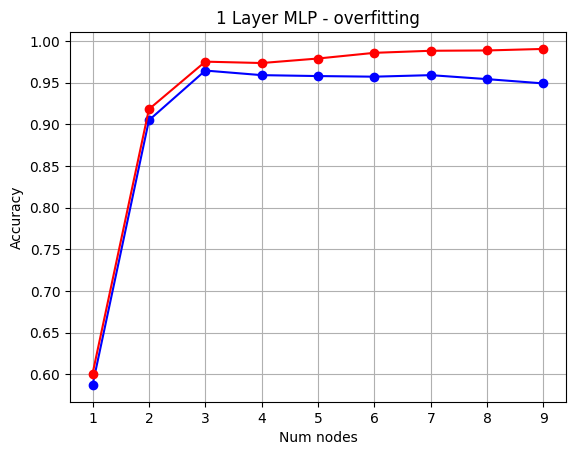

In [16]:
plt.plot(range(1,10), train_accuracies_1node, marker='o', linestyle='-', color='blue')  # 'o' for dots at data points, '-' for a solid line
plt.plot(range(1,10), test_accuracies_1node, marker='o', linestyle='-', color='red')  # 'o' for dots at data points, '-' for a solid line
plt.xlabel('Num nodes')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.title('1 Layer MLP - overfitting')  # Title for the plot
plt.grid(True)  # Show gridlines
plt.show()  # Display the plot

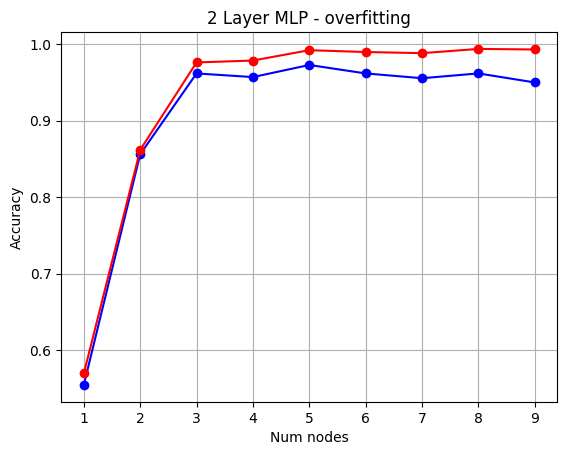

In [17]:
plt.plot(range(1,10), train_accuracies_2layer, marker='o', linestyle='-', color='blue')  # 'o' for dots at data points, '-' for a solid line
plt.plot(range(1,10), test_accuracies_2layer, marker='o', linestyle='-', color='red')  # 'o' for dots at data points, '-' for a solid line
plt.xlabel('Num nodes')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.title('2 Layer MLP - overfitting')  # Title for the plot
plt.grid(True)  # Show gridlines
plt.show()  # Display the plot

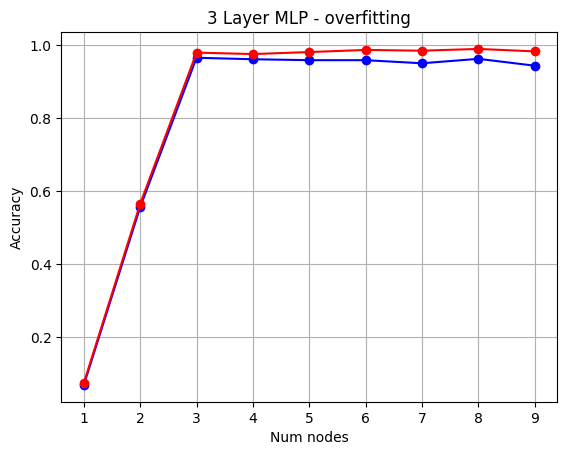

In [18]:
plt.plot(range(1,10), train_accuracies_3layer, marker='o', linestyle='-', color='blue')  # 'o' for dots at data points, '-' for a solid line
plt.plot(range(1,10), test_accuracies_3layer, marker='o', linestyle='-', color='red')  # 'o' for dots at data points, '-' for a solid line
plt.xlabel('Num nodes')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.title('3 Layer MLP - overfitting')  # Title for the plot
plt.grid(True)  # Show gridlines
plt.show()  # Display the plot

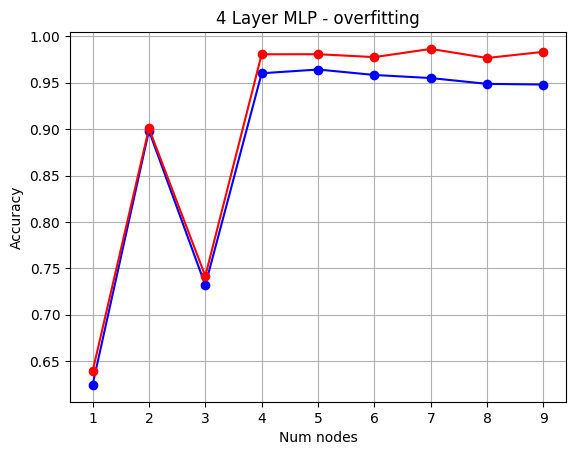

In [19]:
plt.plot(range(1,10), train_accuracies_4layer, marker='o', linestyle='-', color='blue')  # 'o' for dots at data points, '-' for a solid line
plt.plot(range(1,10), test_accuracies_4layer, marker='o', linestyle='-', color='red')  # 'o' for dots at data points, '-' for a solid line
plt.xlabel('Num nodes')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.title('4 Layer MLP - overfitting')  # Title for the plot
plt.grid(True)  # Show gridlines
plt.show()  # Display the plot

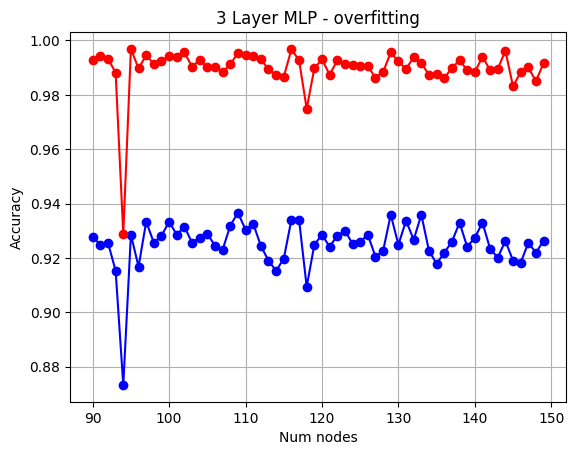

In [13]:

plt.plot(range(90,150), larg_train_acc, marker='o', linestyle='-', color='blue')  # 'o' for dots at data points, '-' for a solid line
plt.plot(range(90,150), larg_test_acc, marker='o', linestyle='-', color='red')  # 'o' for dots at data points, '-' for a solid line
plt.xlabel('Num nodes')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.title('3 Layer MLP - overfitting')  # Title for the plot
plt.grid(True)  # Show gridlines
plt.show()  # Display the plot